In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.topic_model.chatgpt_describe_data import describeDeviceData
from src.topic_model.hierarchical_topic_model import createTopicModel
from src.topic_model.embeddings import getDeviceEmbeddings
from src.topic_model.models import GPTModel, GPTEmbeddings
from src.topic_model.input_wordcloud import wordCloudForDeviceNames

## Word cloud for device names

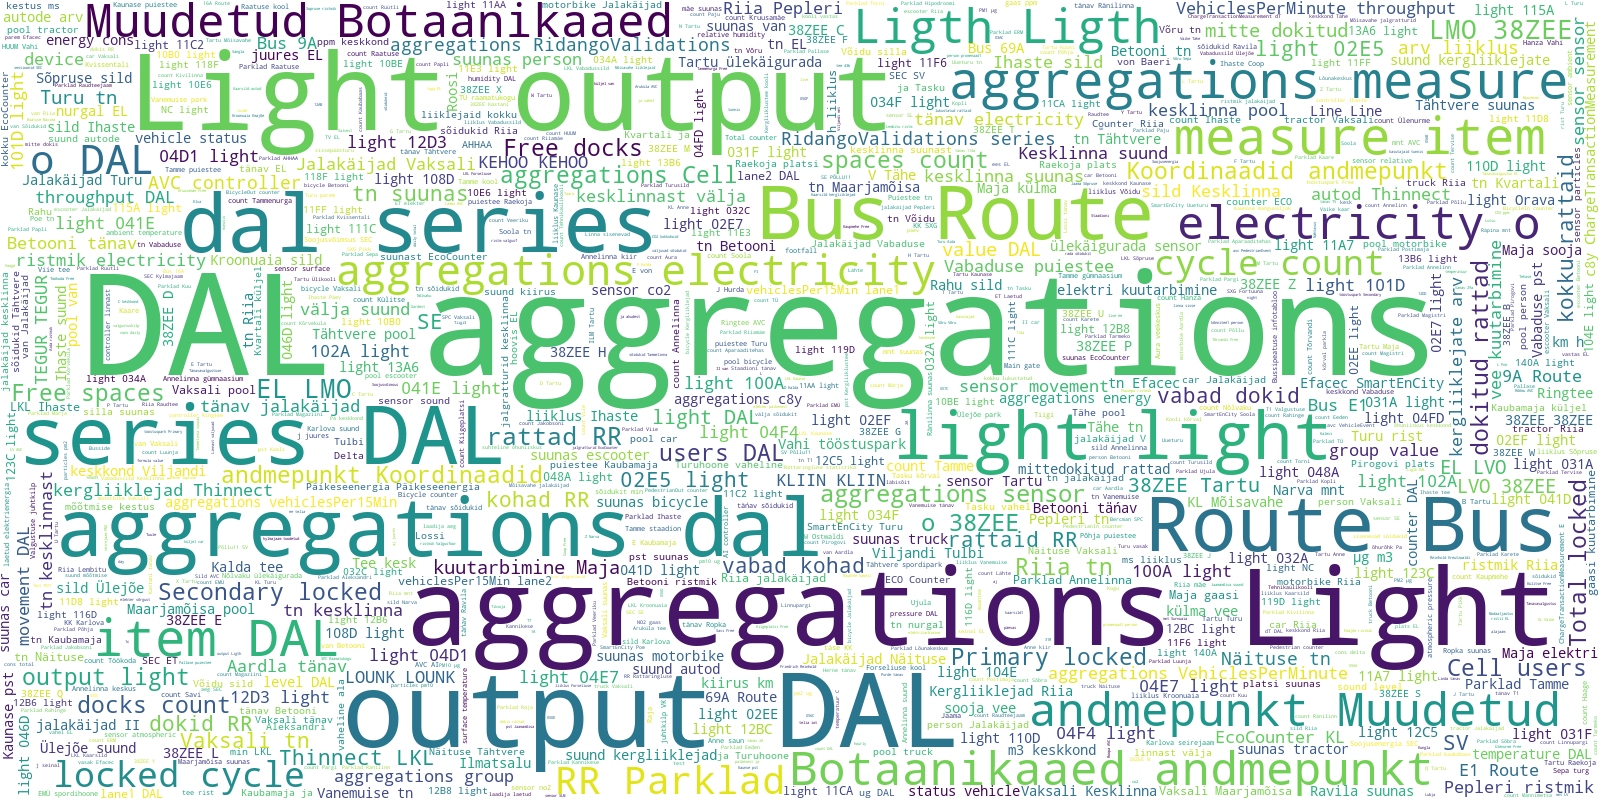

In [4]:
wordCloudForDeviceNames()

## Describe data with ChatGPT-4 Turbo

{
&emsp; "role": "system",
&emsp; "content": 
&emsp;&emsp;&emsp; Take on the persona of a data analyst who is proficient in interpreting JSON objects and extracting meaningful insights from them.
&emsp;&emsp;&emsp; The user will provide JSON objects representing measurement data from a smart city IoT device.   
},
{
&emsp; "role": "user",
&emsp; "content":
&emsp;&emsp;&emsp; Ignore device specific information and concisely summarise what kind of data is being sent.
&emsp;&emsp;&emsp; Don't use references to time intervals such as "hourly", "daily" and "monthly".
&emsp;&emsp;&emsp; Avoid generic terms like "IoT" and "smart city".
&emsp;&emsp;&emsp; Also provide example of a smart city domain this device belongs to.
&emsp;&emsp;&emsp; f"{message_data}
}

In [3]:
describeDeviceData(GPTModel.GPT_4_TURBO)

requesting data for gpt-4-turbo: 100%|██████████| 14307/14307 [time elapsed: 35:50:24]


## Generate text embeddings from descriptions

In [4]:
getDeviceEmbeddings(GPTModel.GPT_4_TURBO, GPTEmbeddings.EMBEDDINGS_LARGE)

getting embeddings: 100%|██████████| 14307/14307 [time elapsed: 4:55:28]


## Create BERTTopic hierarchical topic model

In [6]:
topic_model, hierarchical_topics, topics, probs, custom_label = createTopicModel(GPTModel.GPT_4_TURBO)

In [7]:
topic_model.visualize_hierarchy(title='')

In [8]:
topic_model.set_topic_labels(custom_label)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics, custom_labels=custom_label, width=600)